# To Do:
- Import new toto dataset and re run everything as it will constantly be updated twice a week

1. Find out the winning amounts for each division when the prize pool is different
eg. 1 mil, 2 mil, 5 mil, >8 mil(doing right now)
2. Look through the rules again
3. Predict the prize based on the toto dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read the toto dataset
toto = pd.read_csv("ToTo.csv")

In [ ]:
# Analyse the toto dataset part 1
toto.describe()

,Draw,Winning Number 1,2,3,4,5,6,Additional Number,Low,High,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
count,"1,646.00","1,646.00","1,646.00","1,646.00","1,646.00","1,646.00","1,646.00","1,646.00","1,646.00","1,646.00",...,"1,333.00","1,333.00","1,333.00","1,333.00","1,333.00","1,333.00","1,333.00","1,333.00",991.00,991.00
mean,"3,163.50",6.84,13.73,20.64,27.63,34.44,41.45,24.11,2.96,3.04,...,199.52,"1,647.75",477.83,412.32,"8,099.87",44.87,"10,861.27",23.72,"154,146.92",10.00
std,475.30,5.47,7.10,7.76,7.79,7.24,5.84,13.85,1.14,1.14,...,163.31,475.89,406.52,116.96,"7,882.64",8.74,"10,733.80",2.18,"120,454.62",0.00
min,"2,341.00",1.00,2.00,3.00,7.00,12.00,13.00,1.00,0.00,0.00,...,1.00,335.00,1.00,87.00,6.00,30.00,9.00,20.00,"55,320.00",10.00
25%,"2,752.25",3.00,8.00,15.00,22.00,29.00,38.00,12.00,2.00,2.00,...,99.00,"1,329.00",249.00,339.00,"4,493.00",30.00,"6,115.00",20.00,"92,806.50",10.00
50%,"3,163.50",5.00,13.00,20.00,28.00,35.00,43.00,24.00,3.00,3.00,...,151.00,"1,636.00",365.00,401.00,"6,344.00",50.00,"8,548.00",25.00,"116,935.00",10.00
75%,"3,574.75",9.00,18.00,26.00,33.00,40.00,46.00,36.00,4.00,4.00,...,237.00,"1,951.00",578.00,478.00,"9,784.00",50.00,"13,010.00",25.00,"162,440.50",10.00
max,"3,986.00",35.00,38.00,44.00,47.00,48.00,49.00,49.00,6.00,6.00,...,"1,900.00","3,689.00","5,248.00",786.00,"91,730.00",50.00,"135,298.00",25.00,"1,351,914.00",10.00


In [ ]:
# Analyse the toto dataset part 2
toto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Draw                1646 non-null   int64  
 1   Date                1646 non-null   object 
 2   Winning Number 1    1646 non-null   int64  
 3   2                   1646 non-null   int64  
 4   3                   1646 non-null   int64  
 5   4                   1646 non-null   int64  
 6   5                   1646 non-null   int64  
 7   6                   1646 non-null   int64  
 8   Additional Number   1646 non-null   int64  
 9   From Last           978 non-null    object 
 10  Low                 1646 non-null   int64  
 11  High                1646 non-null   int64  
 12  Odd                 1646 non-null   int64  
 13  Even                1646 non-null   int64  
 14  1-10                1646 non-null   int64  
 15  11-20               1646 non-null   int64  
 16  21-30 

In [ ]:
# Convert the 'Date' column into datetime data type
toto['Date'] = pd.to_datetime(toto['Date'])

In [ ]:
# Check the above step was done correctly
toto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Draw                1646 non-null   int64         
 1   Date                1646 non-null   datetime64[ns]
 2   Winning Number 1    1646 non-null   int64         
 3   2                   1646 non-null   int64         
 4   3                   1646 non-null   int64         
 5   4                   1646 non-null   int64         
 6   5                   1646 non-null   int64         
 7   6                   1646 non-null   int64         
 8   Additional Number   1646 non-null   int64         
 9   From Last           978 non-null    object        
 10  Low                 1646 non-null   int64         
 11  High                1646 non-null   int64         
 12  Odd                 1646 non-null   int64         
 13  Even                1646 non-null   int64       

In [ ]:
# Add a cutoff date for due to TOTO rule changes, changed to 6 out of 49 to
# jackpot from 6 out of 45
cutoff_date = '2014-10-7'
toto = toto[toto['Date'] >= cutoff_date]
toto['Date'] = toto['Date'].dt.strftime('%d-%m-%Y')

In [ ]:
# Check that the above was done part 1
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 991
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Draw                992 non-null    int64  
 1   Date                992 non-null    object 
 2   Winning Number 1    992 non-null    int64  
 3   2                   992 non-null    int64  
 4   3                   992 non-null    int64  
 5   4                   992 non-null    int64  
 6   5                   992 non-null    int64  
 7   6                   992 non-null    int64  
 8   Additional Number   992 non-null    int64  
 9   From Last           588 non-null    object 
 10  Low                 992 non-null    int64  
 11  High                992 non-null    int64  
 12  Odd                 992 non-null    int64  
 13  Even                992 non-null    int64  
 14  1-10                992 non-null    int64  
 15  11-20               992 non-null    int64  
 16  21-30        

In [ ]:
# Check that the above was done part 2
toto.describe()

,Draw,Winning Number 1,2,3,4,5,6,Additional Number,Low,High,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
count,992.00,992.00,992.00,992.00,992.00,992.00,992.00,992.00,992.00,992.00,...,991.00,991.00,991.00,991.00,991.00,991.00,991.00,991.00,991.00,991.00
mean,"3,490.50",6.85,14.08,21.25,28.50,35.59,43.03,25.26,2.96,3.04,...,167.48,"1,759.07",420.10,378.39,"8,629.89",50.00,"11,506.01",25.00,"154,146.92",10.00
std,286.51,5.62,7.37,7.93,8.03,7.28,5.44,14.25,1.13,1.13,...,137.47,466.44,350.73,90.92,"6,837.27",0.00,"9,209.70",0.00,"120,454.62",0.00
min,"2,995.00",1.00,2.00,4.00,7.00,14.00,19.00,1.00,0.00,0.00,...,46.00,335.00,108.00,87.00,"2,896.00",50.00,"3,985.00",25.00,"55,320.00",10.00
25%,"3,242.75",3.00,9.00,15.00,23.00,31.00,40.00,13.00,2.00,2.00,...,90.00,"1,458.00",235.50,323.00,"4,989.00",50.00,"6,786.50",25.00,"92,806.50",10.00
50%,"3,490.50",5.00,13.00,21.00,29.00,36.00,44.00,25.00,3.00,3.00,...,121.00,"1,747.00",314.00,381.00,"6,477.00",50.00,"8,672.00",25.00,"116,935.00",10.00
75%,"3,738.25",9.00,19.00,27.00,34.00,41.00,47.00,37.00,4.00,4.00,...,194.00,"2,039.50",454.50,441.00,"9,340.50",50.00,"12,175.50",25.00,"162,440.50",10.00
max,"3,986.00",33.00,38.00,44.00,47.00,48.00,49.00,49.00,6.00,6.00,...,"1,630.00","3,689.00","4,426.00",751.00,"78,984.00",50.00,"111,163.00",25.00,"1,351,914.00",10.00


In [ ]:
# Through analysing the data, it is found that the most recent draw has not been
# updated yet(shown below) and should be removed
toto.head()

,Draw,Date,Winning Number 1,2,3,4,5,6,Additional Number,From Last,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
0,3986,27-06-2024,1,8,11,14,17,30,5,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3985,24-06-2024,20,23,28,30,34,49,25,30,...,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00
2,3984,20-06-2024,3,12,14,16,17,30,27,"12,16,17,30",...,129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00
3,3983,17-06-2024,8,10,12,16,17,30,19,"10,17,30",...,290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00
4,3982,13-06-2024,4,7,10,17,30,41,21,10,...,145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00


# The TOTO results information is only updated to 24/6/2024

In [ ]:
# Rmove the most recent draw row
toto.drop(0,inplace=True)
toto.head()

,Draw,Date,Winning Number 1,2,3,4,5,6,Additional Number,From Last,...,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
1,3985,24-06-2024,20,23,28,30,34,49,25,30,...,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00
2,3984,20-06-2024,3,12,14,16,17,30,27,"12,16,17,30",...,129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00
3,3983,17-06-2024,8,10,12,16,17,30,19,"10,17,30",...,290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00
4,3982,13-06-2024,4,7,10,17,30,41,21,10,...,145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00
5,3981,10-06-2024,1,10,13,23,31,34,43,10,...,191.00,944.00,371.00,265.00,"7,449.00",50.00,"8,003.00",25.00,"117,250.00",10.00


In [ ]:
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Draw                991 non-null    int64  
 1   Date                991 non-null    object 
 2   Winning Number 1    991 non-null    int64  
 3   2                   991 non-null    int64  
 4   3                   991 non-null    int64  
 5   4                   991 non-null    int64  
 6   5                   991 non-null    int64  
 7   6                   991 non-null    int64  
 8   Additional Number   991 non-null    int64  
 9   From Last           587 non-null    object 
 10  Low                 991 non-null    int64  
 11  High                991 non-null    int64  
 12  Odd                 991 non-null    int64  
 13  Even                991 non-null    int64  
 14  1-10                991 non-null    int64  
 15  11-20               991 non-null    int64  
 16  21-30        

In [ ]:
# Create a new dataframe called 'toto_winnings'
toto_winnings = toto[['Date','Division 1 Winners','Division 1 Prize',
                      'Division 2 Winners','Division 2 Prize',
                      'Division 3 Winners','Division 3 Prize',
                      'Division 4 Winners','Division 4 Prize',
                      'Division 5 Winners','Division 5 Prize',
                      'Division 6 Winners','Division 6 Prize',
                      'Division 7 Winners','Division 7 Prize']]
toto_winnings.head()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
1,24-06-2024,0.00,0.00,0.00,0.00,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00
2,20-06-2024,1.00,"1,195,673.00",9.00,"27,969.00",129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00
3,17-06-2024,1.00,"2,885,049.00",4.00,"88,458.00",290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00
4,13-06-2024,0.00,0.00,2.00,"126,775.00",145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00
5,10-06-2024,2.00,"622,568.00",12.00,"21,845.00",191.00,944.00,371.00,265.00,"7,449.00",50.00,"8,003.00",25.00,"117,250.00",10.00


In [ ]:
# Drop the columns in toto_winnings from the original dataframe
toto.drop(columns=['Division 1 Winners','Division 1 Prize',
                      'Division 2 Winners','Division 2 Prize',
                      'Division 3 Winners','Division 3 Prize',
                      'Division 4 Winners','Division 4 Prize',
                      'Division 5 Winners','Division 5 Prize',
                      'Division 6 Winners','Division 6 Prize',
                      'Division 7 Winners','Division 7 Prize'],inplace=True)
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Draw               991 non-null    int64 
 1   Date               991 non-null    object
 2   Winning Number 1   991 non-null    int64 
 3   2                  991 non-null    int64 
 4   3                  991 non-null    int64 
 5   4                  991 non-null    int64 
 6   5                  991 non-null    int64 
 7   6                  991 non-null    int64 
 8   Additional Number  991 non-null    int64 
 9   From Last          587 non-null    object
 10  Low                991 non-null    int64 
 11  High               991 non-null    int64 
 12  Odd                991 non-null    int64 
 13  Even               991 non-null    int64 
 14  1-10               991 non-null    int64 
 15  11-20              991 non-null    int64 
 16  21-30              991 non-null    int64 
 17  31

In [ ]:
# Rename columns 2,3,4,5,6 to Winning Number 2,3,4,5,6
toto.rename(columns={'2': 'Winning Number 2',
            '3': 'Winning Number 3',
            '4': 'Winning Number 4',
            '5': 'Winning Number 5',
            '6': 'Winning Number 6'},inplace=True)
toto.head()

,Draw,Date,Winning Number 1,Winning Number 2,Winning Number 3,Winning Number 4,Winning Number 5,Winning Number 6,Additional Number,From Last,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
1,3985,24-06-2024,20,23,28,30,34,49,25,30,2,4,2,4,0,1,3,1,1
2,3984,20-06-2024,3,12,14,16,17,30,27,"12,16,17,30",5,1,2,4,1,4,1,0,0
3,3983,17-06-2024,8,10,12,16,17,30,19,"10,17,30",5,1,1,5,2,3,1,0,0
4,3982,13-06-2024,4,7,10,17,30,41,21,10,4,2,3,3,3,1,1,0,1
5,3981,10-06-2024,1,10,13,23,31,34,43,10,4,2,4,2,2,1,1,2,0


In [ ]:
# Update the Draw Number
toto['Updated Draw Num'] = range(len(toto)-1, -1, -1)
toto.head()

,Draw,Date,Winning Number 1,Winning Number 2,Winning Number 3,Winning Number 4,Winning Number 5,Winning Number 6,Additional Number,From Last,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50,Updated Draw Num
1,3985,24-06-2024,20,23,28,30,34,49,25,30,2,4,2,4,0,1,3,1,1,990
2,3984,20-06-2024,3,12,14,16,17,30,27,"12,16,17,30",5,1,2,4,1,4,1,0,0,989
3,3983,17-06-2024,8,10,12,16,17,30,19,"10,17,30",5,1,1,5,2,3,1,0,0,988
4,3982,13-06-2024,4,7,10,17,30,41,21,10,4,2,3,3,3,1,1,0,1,987
5,3981,10-06-2024,1,10,13,23,31,34,43,10,4,2,4,2,2,1,1,2,0,986


In [ ]:
# Low means <=24 while high means >=25 so kinda useless information
# So removing the two columns
toto.drop(columns=['High','Low'],inplace=True)
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Draw               991 non-null    int64 
 1   Date               991 non-null    object
 2   Winning Number 1   991 non-null    int64 
 3   Winning Number 2   991 non-null    int64 
 4   Winning Number 3   991 non-null    int64 
 5   Winning Number 4   991 non-null    int64 
 6   Winning Number 5   991 non-null    int64 
 7   Winning Number 6   991 non-null    int64 
 8   Additional Number  991 non-null    int64 
 9   From Last          587 non-null    object
 10  Odd                991 non-null    int64 
 11  Even               991 non-null    int64 
 12  1-10               991 non-null    int64 
 13  11-20              991 non-null    int64 
 14  21-30              991 non-null    int64 
 15  31-40              991 non-null    int64 
 16  41-50              991 non-null    int64 
 17  Up

In [ ]:
# Drop the old Draw number also
toto.drop(columns=['Draw'],inplace=True)
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               991 non-null    object
 1   Winning Number 1   991 non-null    int64 
 2   Winning Number 2   991 non-null    int64 
 3   Winning Number 3   991 non-null    int64 
 4   Winning Number 4   991 non-null    int64 
 5   Winning Number 5   991 non-null    int64 
 6   Winning Number 6   991 non-null    int64 
 7   Additional Number  991 non-null    int64 
 8   From Last          587 non-null    object
 9   Odd                991 non-null    int64 
 10  Even               991 non-null    int64 
 11  1-10               991 non-null    int64 
 12  11-20              991 non-null    int64 
 13  21-30              991 non-null    int64 
 14  31-40              991 non-null    int64 
 15  41-50              991 non-null    int64 
 16  Updated Draw Num   991 non-null    int64 
dtypes:

In [ ]:
toto.head()

,Date,Winning Number 1,Winning Number 2,Winning Number 3,Winning Number 4,Winning Number 5,Winning Number 6,Additional Number,From Last,Odd,Even,1-10,11-20,21-30,31-40,41-50,Updated Draw Num
1,24-06-2024,20,23,28,30,34,49,25,30,2,4,0,1,3,1,1,990
2,20-06-2024,3,12,14,16,17,30,27,"12,16,17,30",2,4,1,4,1,0,0,989
3,17-06-2024,8,10,12,16,17,30,19,"10,17,30",1,5,2,3,1,0,0,988
4,13-06-2024,4,7,10,17,30,41,21,10,3,3,3,1,1,0,1,987
5,10-06-2024,1,10,13,23,31,34,43,10,4,2,2,1,1,2,0,986


In [ ]:
toto_winnings.head()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize
1,24-06-2024,0.00,0.00,0.00,0.00,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00
2,20-06-2024,1.00,"1,195,673.00",9.00,"27,969.00",129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00
3,17-06-2024,1.00,"2,885,049.00",4.00,"88,458.00",290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00
4,13-06-2024,0.00,0.00,2.00,"126,775.00",145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00
5,10-06-2024,2.00,"622,568.00",12.00,"21,845.00",191.00,944.00,371.00,265.00,"7,449.00",50.00,"8,003.00",25.00,"117,250.00",10.00


In [ ]:
# Get the Prize value for each division as it is split among the number of
# winners in that division

# Create a loop that create a Prize Per Winner column for each division
for i in range(1,5):
    toto_winnings[f'Division {i} Prize Per Winner'] = toto_winnings[f'Division {i} Prize'] / toto_winnings[f'Division {i} Winners']

toto_winnings.fillna(0,inplace=True)
toto_winnings.head()

C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\180003424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toto_winnings[f'Division {i} Prize Per Winner'] = toto_winnings[f'Division {i} Prize'] / toto_winnings[f'Division {i} Winners']


,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner
1,24-06-2024,0.00,0.00,0.00,0.00,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00,0.00,0.00,23.93,1.44
2,20-06-2024,1.00,"1,195,673.00",9.00,"27,969.00",129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00,"1,195,673.00","3,107.67",10.40,0.78
3,17-06-2024,1.00,"2,885,049.00",4.00,"88,458.00",290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00,"2,885,049.00","22,114.50",2.89,0.42
4,13-06-2024,0.00,0.00,2.00,"126,775.00",145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00,0.00,"63,387.50",8.30,0.90
5,10-06-2024,2.00,"622,568.00",12.00,"21,845.00",191.00,944.00,371.00,265.00,"7,449.00",50.00,"8,003.00",25.00,"117,250.00",10.00,"311,284.00","1,820.42",4.94,0.71


In [ ]:
toto_winnings_split = toto_winnings.drop(columns=['Division 1 Winners','Division 1 Prize',
                      'Division 2 Winners','Division 2 Prize',
                      'Division 3 Winners','Division 3 Prize',
                      'Division 4 Winners','Division 4 Prize',
                      'Division 5 Winners',
                      'Division 6 Winners',
                      'Division 7 Winners'],inplace=False)


In [ ]:
# Rename columns Division 5,6,7 Prize to Division 5,6,7 Prize Per Winner
toto_winnings_split.rename(columns={'Division 5 Prize': 'Division 5 Prize Per Winner',
                    'Division 6 Prize': 'Division 6 Prize Per Winner',
                    'Division 7 Prize': 'Division 7 Prize Per Winner',},inplace=True)

# Change column order
desired_columns = ['Division 1 Prize Per Winner','Division 2 Prize Per Winner',
                    'Division 3 Prize Per Winner','Division 4 Prize Per Winner',
                    'Division 5 Prize Per Winner','Division 6 Prize Per Winner',
                    'Division 7 Prize Per Winner']

toto_winnings_split = toto_winnings_split[desired_columns]
toto_winnings_split.head()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner
1,0.00,0.00,23.93,1.44,50.00,25.00,10.00
2,"1,195,673.00","3,107.67",10.40,0.78,50.00,25.00,10.00
3,"2,885,049.00","22,114.50",2.89,0.42,50.00,25.00,10.00
4,0.00,"63,387.50",8.30,0.90,50.00,25.00,10.00
5,"311,284.00","1,820.42",4.94,0.71,50.00,25.00,10.00


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
toto_winnings_split.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner
count,991.00,991.00,991.00,991.00,991.00,991.00,991.00
mean,"1,026,010.82","94,927.01",15.95,1.33,50.00,25.00,10.00
std,"1,867,801.20","195,682.52",10.98,0.85,0.00,0.00,0.00
min,0.00,0.00,0.70,0.05,50.00,25.00,10.00
25%,0.00,"11,213.79",7.29,0.71,50.00,25.00,10.00
50%,0.00,"30,166.67",13.92,1.18,50.00,25.00,10.00
75%,"1,203,936.33","79,413.25",21.61,1.78,50.00,25.00,10.00
max,"13,123,509.00","2,908,209.00",69.83,6.95,50.00,25.00,10.00


# From the above we can observe that based on mean:
- If only quickpick is bought, you need to be in at least one of the divisions to profit
- If you choose to buy system 6 or 7, you have to not be in division 4 to profit

FYI:
- Division 1 means all 6 correct numbers
- Division 2 means 5 correct numbers + additional number
- Division 3 means 5 correct numbers
- Division 4 means 4 correct numbers + additional number
- Division 5 means 4 correct numbers
- Division 6 means 3 correct numbers + additional number
- Division 7 means 3 correct numbers

# Find out winning amounts for each division when prize pool is different
- prize pool is differnt due to snowballing effect
- based on Division 1 Prize and the number of zeroes between rows

Division 1 Prize
- If no zeros in next consecutive row or prize is 0: prize pool 4
- If 1 zero in next consecutive row: prize pool 3
- If 2 zeroes in next 2 consecutive rows: prize pool 2
- If 3 zeroes in next 3 consecutive rows: prize pool 1

How to determine:
- Start from the last value that is a 0
  - 0: prize pool 4, `zero_count` += 1
  - not 0:
    - `zero_count` == 0: prize pool 4
    - `zero_count` == 1: prize pool 3
    - `zero_count` == 2: prize pool 2
    - `zero_count` == 3: prize pool 1

Exception Case:
- Any values after the rule change that is not 0: manually check and do, should
be only a few

In [ ]:
toto_winnings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         991 non-null    object 
 1   Division 1 Winners           991 non-null    float64
 2   Division 1 Prize             991 non-null    float64
 3   Division 2 Winners           991 non-null    float64
 4   Division 2 Prize             991 non-null    float64
 5   Division 3 Winners           991 non-null    float64
 6   Division 3 Prize             991 non-null    float64
 7   Division 4 Winners           991 non-null    float64
 8   Division 4 Prize             991 non-null    float64
 9   Division 5 Winners           991 non-null    float64
 10  Division 5 Prize             991 non-null    float64
 11  Division 6 Winners           991 non-null    float64
 12  Division 6 Prize             991 non-null    float64
 13  Division 7 Winners       

In [ ]:
toto_winnings.tail()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner
987,23-10-2014,0.00,0.00,0.00,0.00,64.00,"2,162.00",178.00,424.00,"4,705.00",50.00,"5,774.00",25.00,"81,579.00",10.00,0.00,0.00,33.78,2.38
988,20-10-2014,1.00,"3,803,159.00",3.00,"115,464.00",166.00,"1,435.00",350.00,372.00,"8,404.00",50.00,"9,021.00",25.00,"148,908.00",10.00,"3,803,159.00","38,488.00",8.64,1.06
989,16-10-2014,0.00,0.00,2.00,"119,110.00",83.00,"1,974.00",216.00,414.00,"5,635.00",50.00,"5,731.00",25.00,"90,370.00",10.00,0.00,"59,555.00",23.78,1.92
990,13-10-2014,0.00,0.00,1.00,"216,057.00",61.00,"2,436.00",108.00,751.00,"3,414.00",50.00,"4,846.00",25.00,"69,704.00",10.00,0.00,"216,057.00",39.93,6.95
991,09-10-2014,1.00,"2,085,106.00",1.00,"280,122.00",95.00,"2,028.00",239.00,440.00,"5,400.00",50.00,"7,553.00",25.00,"102,478.00",10.00,"2,085,106.00","280,122.00",21.35,1.84


In [ ]:
# Split the dataset into the different prize pools based on Division 1 Prize

# Get the last row of the dataframe and add it in later
last_row = toto_winnings.tail(1)
last_row

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner
991,09-10-2014,1.00,"2,085,106.00",1.00,"280,122.00",95.00,"2,028.00",239.00,440.00,"5,400.00",50.00,"7,553.00",25.00,"102,478.00",10.00,"2,085,106.00","280,122.00",21.35,1.84


In [ ]:
# Remove the last row from the dataframe
toto_winnings = toto_winnings[:-1]
toto_winnings.tail()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner
986,27-10-2014,0.00,0.00,1.00,"455,390.00",92.00,"1,900.00",199.00,480.00,"4,967.00",50.00,"5,927.00",25.00,"95,542.00",10.00,0.00,"455,390.00",20.65,2.41
987,23-10-2014,0.00,0.00,0.00,0.00,64.00,"2,162.00",178.00,424.00,"4,705.00",50.00,"5,774.00",25.00,"81,579.00",10.00,0.00,0.00,33.78,2.38
988,20-10-2014,1.00,"3,803,159.00",3.00,"115,464.00",166.00,"1,435.00",350.00,372.00,"8,404.00",50.00,"9,021.00",25.00,"148,908.00",10.00,"3,803,159.00","38,488.00",8.64,1.06
989,16-10-2014,0.00,0.00,2.00,"119,110.00",83.00,"1,974.00",216.00,414.00,"5,635.00",50.00,"5,731.00",25.00,"90,370.00",10.00,0.00,"59,555.00",23.78,1.92
990,13-10-2014,0.00,0.00,1.00,"216,057.00",61.00,"2,436.00",108.00,751.00,"3,414.00",50.00,"4,846.00",25.00,"69,704.00",10.00,0.00,"216,057.00",39.93,6.95


In [ ]:
zero_count = 0

# Iterate from the last row
for i in reversed(toto_winnings.index):
  if toto_winnings.loc[i,'Division 1 Prize'] == 0.00:
    zero_count += 1
    if zero_count == 1:
      toto_winnings.loc[i,'Prize Pool'] = 4
    elif zero_count == 2:
      toto_winnings.loc[i,'Prize Pool'] = 3
    elif zero_count == 3:
      toto_winnings.loc[i,'Prize Pool'] = 2
    elif zero_count == 4:
      toto_winnings.loc[i,'Prize Pool'] = 1
      zero_count = 0
  else:
    if zero_count == 0:
      toto_winnings.loc[i,'Prize Pool'] = 4
    elif zero_count == 1:
      toto_winnings.loc[i,'Prize Pool'] = 3
    elif zero_count == 2:
      toto_winnings.loc[i,'Prize Pool'] = 2
    elif zero_count == 3:
      toto_winnings.loc[i,'Prize Pool'] = 1
    zero_count = 0

toto_winnings.head(60)

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Prize Pool
1,24-06-2024,0.00,0.00,0.00,0.00,87.00,"2,082.00",262.00,377.00,"4,809.00",50.00,"7,724.00",25.00,"92,890.00",10.00,0.00,0.00,23.93,1.44,4.00
2,20-06-2024,1.00,"1,195,673.00",9.00,"27,969.00",129.00,"1,342.00",349.00,271.00,"7,703.00",50.00,"8,712.00",25.00,"111,517.00",10.00,"1,195,673.00","3,107.67",10.40,0.78,4.00
3,17-06-2024,1.00,"2,885,049.00",4.00,"88,458.00",290.00,839.00,565.00,235.00,"12,694.00",50.00,"15,079.00",25.00,"187,930.00",10.00,"2,885,049.00","22,114.50",2.89,0.42,3.00
4,13-06-2024,0.00,0.00,2.00,"126,775.00",145.00,"1,203.00",325.00,293.00,"6,763.00",50.00,"8,672.00",25.00,"111,597.00",10.00,0.00,"63,387.50",8.30,0.90,4.00
5,10-06-2024,2.00,"622,568.00",12.00,"21,845.00",191.00,944.00,371.00,265.00,"7,449.00",50.00,"8,003.00",25.00,"117,250.00",10.00,"311,284.00","1,820.42",4.94,0.71,4.00
6,06-06-2024,1.00,"1,177,640.00",5.00,"49,585.00",90.00,"1,894.00",308.00,302.00,"5,681.00",50.00,"9,155.00",25.00,"103,740.00",10.00,"1,177,640.00","9,917.00",21.04,0.98,4.00
7,03-06-2024,1.00,"1,250,273.00",1.00,"263,216.00",76.00,"2,382.00",254.00,389.00,"4,932.00",50.00,"6,917.00",25.00,"89,899.00",10.00,"1,250,273.00","263,216.00",31.34,1.53,4.00
8,30-05-2024,1.00,"1,181,255.00",2.00,"124,343.00",199.00,860.00,438.00,213.00,"8,076.00",50.00,"9,908.00",25.00,"129,784.00",10.00,"1,181,255.00","62,171.50",4.32,0.49,4.00
9,27-05-2024,1.00,"2,959,173.00",2.00,"184,221.00",117.00,"2,165.00",325.00,426.00,"6,891.00",50.00,"9,687.00",25.00,"133,015.00",10.00,"2,959,173.00","92,110.50",18.50,1.31,3.00
10,23-05-2024,0.00,0.00,3.00,"84,848.00",98.00,"1,786.00",278.00,344.00,"5,117.00",50.00,"8,140.00",25.00,"94,724.00",10.00,0.00,"28,282.67",18.22,1.24,4.00


# Prize Pool Explained
- 4: No Snowball occurred, smallest prize pool
- 3: 1x Snowball occurred
- 2: 2x Snowball occurred
- 1: 3x Snowball occurred, largest prize pool


In [ ]:
toto_winnings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 1 to 990
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         990 non-null    object 
 1   Division 1 Winners           990 non-null    float64
 2   Division 1 Prize             990 non-null    float64
 3   Division 2 Winners           990 non-null    float64
 4   Division 2 Prize             990 non-null    float64
 5   Division 3 Winners           990 non-null    float64
 6   Division 3 Prize             990 non-null    float64
 7   Division 4 Winners           990 non-null    float64
 8   Division 4 Prize             990 non-null    float64
 9   Division 5 Winners           990 non-null    float64
 10  Division 5 Prize             990 non-null    float64
 11  Division 6 Winners           990 non-null    float64
 12  Division 6 Prize             990 non-null    float64
 13  Division 7 Winners       

In [ ]:
# Add the prize pool column for the last row removed
last_row['Prize Pool'] = 3.0
last_row

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Prize Pool
991,09-10-2014,1.00,"2,085,106.00",1.00,"280,122.00",95.00,"2,028.00",239.00,440.00,"5,400.00",50.00,"7,553.00",25.00,"102,478.00",10.00,"2,085,106.00","280,122.00",21.35,1.84,3.00


In [ ]:
# Add the last row back into the dataframe
toto_winnings = pd.concat([toto_winnings,last_row],ignore_index=True)
toto_winnings.tail()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Prize Pool
986,23-10-2014,0.00,0.00,0.00,0.00,64.00,"2,162.00",178.00,424.00,"4,705.00",50.00,"5,774.00",25.00,"81,579.00",10.00,0.00,0.00,33.78,2.38,4.00
987,20-10-2014,1.00,"3,803,159.00",3.00,"115,464.00",166.00,"1,435.00",350.00,372.00,"8,404.00",50.00,"9,021.00",25.00,"148,908.00",10.00,"3,803,159.00","38,488.00",8.64,1.06,2.00
988,16-10-2014,0.00,0.00,2.00,"119,110.00",83.00,"1,974.00",216.00,414.00,"5,635.00",50.00,"5,731.00",25.00,"90,370.00",10.00,0.00,"59,555.00",23.78,1.92,3.00
989,13-10-2014,0.00,0.00,1.00,"216,057.00",61.00,"2,436.00",108.00,751.00,"3,414.00",50.00,"4,846.00",25.00,"69,704.00",10.00,0.00,"216,057.00",39.93,6.95,4.00
990,09-10-2014,1.00,"2,085,106.00",1.00,"280,122.00",95.00,"2,028.00",239.00,440.00,"5,400.00",50.00,"7,553.00",25.00,"102,478.00",10.00,"2,085,106.00","280,122.00",21.35,1.84,3.00


In [ ]:
toto_winnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         991 non-null    object 
 1   Division 1 Winners           991 non-null    float64
 2   Division 1 Prize             991 non-null    float64
 3   Division 2 Winners           991 non-null    float64
 4   Division 2 Prize             991 non-null    float64
 5   Division 3 Winners           991 non-null    float64
 6   Division 3 Prize             991 non-null    float64
 7   Division 4 Winners           991 non-null    float64
 8   Division 4 Prize             991 non-null    float64
 9   Division 5 Winners           991 non-null    float64
 10  Division 5 Prize             991 non-null    float64
 11  Division 6 Winners           991 non-null    float64
 12  Division 6 Prize             991 non-null    float64
 13  Division 7 Winners  

In [ ]:
# Create multiple dataframes based on the value of prize pool
pp_4 = toto_winnings[toto_winnings['Prize Pool'] == 4]
pp_3 = toto_winnings[toto_winnings['Prize Pool'] == 3]
pp_2 = toto_winnings[toto_winnings['Prize Pool'] == 2]
pp_1 = toto_winnings[toto_winnings['Prize Pool'] == 1]

#pp_1.head()
#pp_2.head()
#pp_3.head()
#pp_4.head()

#pp_1.info()
#pp_2.info()
#pp_3.info()
#pp_4.info()

In [ ]:
def div_and_format(daf):
  # Create a loop that create a Prize Per Winner column for each division
  for i in range(1,5):
      daf[f'Division {i} Prize Per Winner'] = daf[f'Division {i} Prize'] / daf[f'Division {i} Winners']

  daf.fillna(0,inplace=True)

  daf.drop(columns=['Division 1 Winners','Division 1 Prize',
                        'Division 2 Winners','Division 2 Prize',
                        'Division 3 Winners','Division 3 Prize',
                        'Division 4 Winners','Division 4 Prize',
                        'Division 5 Winners',
                        'Division 6 Winners',
                        'Division 7 Winners'],inplace=True)

  # Rename columns Division 5,6,7 Prize to Division 5,6,7 Prize Per Winner
  daf.rename(columns={'Division 5 Prize': 'Division 5 Prize Per Winner',
                      'Division 6 Prize': 'Division 6 Prize Per Winner',
                      'Division 7 Prize': 'Division 7 Prize Per Winner'},inplace=True)

  # Change column order
  desired_columns = ['Date','Division 1 Prize Per Winner','Division 2 Prize Per Winner',
                      'Division 3 Prize Per Winner','Division 4 Prize Per Winner',
                      'Division 5 Prize Per Winner','Division 6 Prize Per Winner',
                      'Division 7 Prize Per Winner','Prize Pool']

  daf = daf[desired_columns]
  return daf

pp_1 = div_and_format(pp_1)
pp_2 = div_and_format(pp_2)
pp_3 = div_and_format(pp_3)
pp_4 = div_and_format(pp_4)

C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\3092316603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf[f'Division {i} Prize Per Winner'] = daf[f'Division {i} Prize'] / daf[f'Division {i} Winners']
C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\3092316603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf.fillna(0,inplace=True)
C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\3092316603.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
pp_1.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool
count,79.00,79.00,79.00,79.00,79.00,79.00,79.00,79.00
mean,"3,088,351.71","176,749.48",5.65,0.52,50.00,25.00,10.00,1.00
std,"3,745,843.45","443,248.76",4.17,0.37,0.00,0.00,0.00,0.00
min,0.00,"2,519.64",1.94,0.14,50.00,25.00,10.00,1.00
25%,0.00,"8,698.62",3.33,0.31,50.00,25.00,10.00,1.00
50%,"1,752,789.00","19,312.78",4.54,0.43,50.00,25.00,10.00,1.00
75%,"6,845,902.50","80,538.79",5.98,0.57,50.00,25.00,10.00,1.00
max,"13,123,509.00","2,279,855.00",31.65,2.18,50.00,25.00,10.00,1.00


In [ ]:
pp_2.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool
count,164.00,164.00,164.00,164.00,164.00,164.00,164.00,164.00
mean,"1,777,116.07","69,197.42",9.59,0.85,50.00,25.00,10.00,2.00
std,"2,270,414.10","130,921.37",6.44,0.46,0.00,0.00,0.00,0.00
min,0.00,0.00,0.84,0.06,50.00,25.00,10.00,2.00
25%,0.00,"11,648.21",5.96,0.55,50.00,25.00,10.00,2.00
50%,"267,443.00","25,997.00",7.88,0.76,50.00,25.00,10.00,2.00
75%,"4,445,461.50","55,656.62",11.62,1.11,50.00,25.00,10.00,2.00
max,"7,239,827.00","1,030,363.00",47.29,3.44,50.00,25.00,10.00,2.00


In [ ]:
pp_3.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,"1,020,741.21","111,891.42",14.92,1.23,50.00,25.00,10.00,3.00
std,"1,353,113.41","217,433.53",8.71,0.61,0.00,0.00,0.00,0.00
min,0.00,0.00,1.67,0.05,50.00,25.00,10.00,3.00
25%,0.00,"12,408.21",8.38,0.82,50.00,25.00,10.00,3.00
50%,0.00,"37,564.00",13.92,1.15,50.00,25.00,10.00,3.00
75%,"2,494,518.00","88,898.62",19.74,1.62,50.00,25.00,10.00,3.00
max,"9,588,137.00","2,908,209.00",57.56,3.47,50.00,25.00,10.00,3.00


In [ ]:
pp_4.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool
count,448.00,448.00,448.00,448.00,448.00,448.00,448.00,448.00
mean,"390,909.68","78,557.26",20.79,1.71,50.00,25.00,10.00,4.00
std,"900,456.28","103,738.27",11.84,0.95,0.00,0.00,0.00,0.00
min,0.00,0.00,0.70,0.10,50.00,25.00,10.00,4.00
25%,0.00,"10,458.45",11.85,1.07,50.00,25.00,10.00,4.00
50%,0.00,"28,682.67",19.36,1.61,50.00,25.00,10.00,4.00
75%,"1,000,000.00","65,126.88",26.91,2.29,50.00,25.00,10.00,4.00
max,"12,000,000.00","631,272.00",69.83,6.95,50.00,25.00,10.00,4.00


# Problem: Need to account for special event draws like CNY, New Year etc.
- Can see that the max is wrong for all the different dataframes, need to figure out when the special draws happened in the past and group them according instead of being purely based on snowballing (cannot find all dates)
  - New Year Draw
  - Reunion Draw
  - Hong Bao Draw
  - National Day Draw
  - Mid Autumn Draw
- For all the dataframes, the values are also calculated when no one wins:
  - means the Expected Prize Per Winner of each Division is reflected when a certain Prize Pool is BOUGHT,(takes into account when no one wins jackpot also)
  - Can remove rows with 0 values so that the results show the maximum and minimum you can win from a jackpot of each prize pool (done below)

In [ ]:
# Removing rows with 0 values so that the results show the maximum and minimum you can win from a jackpot
toto_winnings_copy = toto_winnings.copy()

# Define columns to check for 0 values
columns_to_check = ['Division 1 Winners',
                    'Division 2 Winners',
                    'Division 3 Winners',
                    'Division 4 Winners',
                    'Division 5 Winners',
                    'Division 6 Winners',
                    'Division 7 Winners']

# Remove rows where any of the specified columns have a zero
toto_winnings_filtered = toto_winnings_copy.loc[(toto_winnings_copy[columns_to_check]!=0).all(axis=1)]

# Create multiple dataframes based on the value of prize pool
pp_4_filtered = toto_winnings_filtered[toto_winnings_filtered['Prize Pool'] == 4]
pp_3_filtered = toto_winnings_filtered[toto_winnings_filtered['Prize Pool'] == 3]
pp_2_filtered = toto_winnings_filtered[toto_winnings_filtered['Prize Pool'] == 2]
pp_1_filtered = toto_winnings_filtered[toto_winnings_filtered['Prize Pool'] == 1]

pp_1_filtered.head()

,Date,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Prize Pool
13,09-05-2024,1.00,"13,123,509.00",12.00,"127,391.00",524.00,"2,006.00","1,463.00",392.00,"31,981.00",50.00,"42,235.00",25.00,"598,997.00",10.00,"13,123,509.00","10,615.92",3.83,0.27,1.00
29,14-03-2024,3.00,"4,469,698.00",15.00,"101,034.00",546.00,"1,909.00","1,612.00",353.00,"30,677.00",50.00,"42,203.00",25.00,"562,557.00",10.00,"1,489,899.33","6,735.60",3.50,0.22,1.00
76,02-10-2023,1.00,"13,077,918.00",25.00,"62,991.00",690.00,"1,570.00","1,936.00",306.00,"36,337.00",50.00,"53,754.00",25.00,"654,305.00",10.00,"13,077,918.00","2,519.64",2.28,0.16,1.00
80,18-09-2023,4.00,"3,244,955.00",9.00,"173,815.00",647.00,"1,663.00","1,441.00",408.00,"34,069.00",50.00,"43,569.00",25.00,"603,512.00",10.00,"811,238.75","19,312.78",2.57,0.28,1.00
130,27-03-2023,4.00,"2,864,243.00",11.00,"110,897.00",463.00,"1,812.00","1,153.00",397.00,"25,482.00",50.00,"32,799.00",25.00,"473,350.00",10.00,"716,060.75","10,081.55",3.91,0.34,1.00


In [ ]:
def div_and_format_2(daf):
  # Create a loop that create a Prize Per Winner column for each division
  for i in range(1,5):
      daf[f'Division {i} Prize Per Winner'] = daf[f'Division {i} Prize'] / daf[f'Division {i} Winners']

  daf['Total Prize'] = (daf['Division 1 Prize'] + daf['Division 2 Prize'] +
                        daf['Division 3 Prize'] + daf['Division 4 Prize'] +
                         (daf['Division 5 Prize'] * daf['Division 5 Winners']) +
                         (daf['Division 6 Prize'] * daf['Division 6 Winners']) +
                         (daf['Division 7 Prize'] * daf['Division 7 Winners']))

  daf.drop(columns=['Division 1 Winners','Division 1 Prize',
                        'Division 2 Winners','Division 2 Prize',
                        'Division 3 Winners','Division 3 Prize',
                        'Division 4 Winners','Division 4 Prize',
                        'Division 5 Winners',
                        'Division 6 Winners',
                        'Division 7 Winners'],inplace=True)

  # Rename columns Division 5,6,7 Prize to Division 5,6,7 Prize Per Winner
  daf.rename(columns={'Division 5 Prize': 'Division 5 Prize Per Winner',
                      'Division 6 Prize': 'Division 6 Prize Per Winner',
                      'Division 7 Prize': 'Division 7 Prize Per Winner'},inplace=True)

  # Change column order
  desired_columns = ['Date','Division 1 Prize Per Winner','Division 2 Prize Per Winner',
                      'Division 3 Prize Per Winner','Division 4 Prize Per Winner',
                      'Division 5 Prize Per Winner','Division 6 Prize Per Winner',
                      'Division 7 Prize Per Winner','Prize Pool','Total Prize']

  daf = daf[desired_columns]
  return daf

pp_1_filtered = div_and_format_2(pp_1_filtered)
pp_2_filtered = div_and_format_2(pp_2_filtered)
pp_3_filtered = div_and_format_2(pp_3_filtered)
pp_4_filtered = div_and_format_2(pp_4_filtered)

C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\2674634825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf[f'Division {i} Prize Per Winner'] = daf[f'Division {i} Prize'] / daf[f'Division {i} Winners']
C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\2674634825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daf['Total Prize'] = (daf['Division 1 Prize'] + daf['Division 2 Prize'] +
C:\Users\ZW\AppData\Local\Temp\ipykernel_25708\2674634825.py:12: SettingWithCopyWarning: 
A value is trying to be set on

# The following below shows the MAX, MIN and AVG of Prize Per Winner IF you WIN the Jackpot
- The values in the same row in describe() is not neccessarily from the same row in the dataframe

In [ ]:
pp_1_filtered.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,"4,435,996.10","32,817.06",5.58,0.52,50.00,25.00,10.00,1.00,"10,855,062.73"
std,"3,765,454.03","95,177.06",4.67,0.41,0.00,0.00,0.00,0.00,"3,874,811.10"
min,"334,660.17","2,519.64",1.94,0.16,50.00,25.00,10.00,1.00,"2,485,999.00"
25%,"1,358,737.67","6,771.47",3.30,0.30,50.00,25.00,10.00,1.00,"8,464,074.00"
50%,"2,655,752.50","10,882.67",4.31,0.41,50.00,25.00,10.00,1.00,"10,960,405.00"
75%,"8,005,273.50","22,707.27",5.82,0.51,50.00,25.00,10.00,1.00,"12,685,358.00"
max,"13,123,509.00","651,039.00",31.65,2.18,50.00,25.00,10.00,1.00,"22,846,535.00"


In [ ]:
pp_2_filtered.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,"3,404,331.78","66,626.90",8.36,0.79,50.00,25.00,10.00,2.00,"7,048,594.48"
std,"2,100,079.77","114,189.18",6.04,0.43,0.00,0.00,0.00,0.00,"2,574,301.25"
min,"176,794.60","1,837.00",0.84,0.06,50.00,25.00,10.00,2.00,"1,673,753.00"
25%,"1,159,132.75","11,584.62",5.15,0.45,50.00,25.00,10.00,2.00,"5,562,838.50"
50%,"4,462,715.00","25,310.00",6.98,0.74,50.00,25.00,10.00,2.00,"7,185,010.00"
75%,"5,073,876.50","59,219.67",9.71,1.07,50.00,25.00,10.00,2.00,"8,316,055.00"
max,"7,239,827.00","543,104.00",47.29,2.72,50.00,25.00,10.00,2.00,"22,753,325.00"


In [ ]:
pp_3_filtered.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,"2,259,135.99","69,746.09",11.17,1.06,50.00,25.00,10.00,3.00,"5,170,035.85"
std,"1,125,962.80","107,074.85",7.26,0.56,0.00,0.00,0.00,0.00,"2,765,829.85"
min,"116,492.00",503.97,1.67,0.05,50.00,25.00,10.00,3.00,"2,689,110.00"
25%,"2,071,999.00","11,309.03",5.74,0.72,50.00,25.00,10.00,3.00,"3,971,019.75"
50%,"2,554,108.50","22,552.40",9.43,0.96,50.00,25.00,10.00,3.00,"4,614,238.00"
75%,"2,823,540.75","76,364.50",15.45,1.49,50.00,25.00,10.00,3.00,"5,151,463.25"
max,"9,588,137.00","607,646.00",33.49,2.62,50.00,25.00,10.00,3.00,"21,199,927.00"


In [ ]:
pp_4_filtered.describe()

,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
count,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00,135.00
mean,"1,199,036.75","86,480.30",15.91,1.41,50.00,25.00,10.00,4.00,"3,803,557.08"
std,"1,285,542.75","111,203.34",11.24,0.86,0.00,0.00,0.00,0.00,"3,705,965.70"
min,"44,436.40",536.04,0.70,0.10,50.00,25.00,10.00,4.00,"1,585,746.00"
25%,"1,000,000.00","14,416.88",7.55,0.82,50.00,25.00,10.00,4.00,"2,425,168.50"
50%,"1,127,768.00","30,320.00",14.34,1.39,50.00,25.00,10.00,4.00,"2,750,773.00"
75%,"1,206,371.00","78,641.75",21.61,1.94,50.00,25.00,10.00,4.00,"3,046,574.50"
max,"12,000,000.00","625,091.00",69.83,4.09,50.00,25.00,10.00,4.00,"23,709,249.00"


In [ ]:
pp_1_filtered_sorted = pp_1_filtered.sort_values(by=['Total Prize'],ascending=False)
pp_1_filtered_sorted.head(20)

,Date,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
76,02-10-2023,"13,077,918.00","2,519.64",2.28,0.16,50.00,25.00,10.00,1.00,"22,846,535.00"
13,09-05-2024,"13,123,509.00","10,615.92",3.83,0.27,50.00,25.00,10.00,1.00,"21,898,193.00"
189,01-09-2022,"11,414,547.00","33,421.33",4.01,0.34,50.00,25.00,10.00,1.00,"18,188,021.00"
467,14-10-2019,"9,348,725.00","7,750.36",2.56,0.27,50.00,25.00,10.00,1.00,"15,160,171.00"
548,03-01-2019,"9,731,377.00","5,871.69",5.77,0.32,50.00,25.00,10.00,1.00,"15,026,273.00"
850,11-02-2016,"9,545,480.00","8,922.50",4.73,0.34,50.00,25.00,10.00,1.00,"14,562,164.00"
456,21-11-2019,"9,080,133.00","10,882.67",3.57,0.47,50.00,25.00,10.00,1.00,"14,297,719.00"
428,27-02-2020,"9,310,169.00","36,698.00",5.72,0.48,50.00,25.00,10.00,1.00,"14,096,665.00"
648,18-01-2018,"8,614,827.00","16,102.71",3.11,0.42,50.00,25.00,10.00,1.00,"13,955,035.00"
422,19-03-2020,"8,856,507.00","4,942.31",5.00,0.34,50.00,25.00,10.00,1.00,"13,727,048.00"


In [ ]:
pp_2_filtered_sorted = pp_2_filtered.sort_values(by=['Total Prize'],ascending=False)
pp_2_filtered_sorted.head(20)

,Date,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
247,11-02-2022,"303,389.25","1,837.00",0.84,0.06,50.00,25.00,10.00,2.00,"22,753,325.00"
146,30-01-2023,"7,239,827.00","22,693.50",6.96,0.56,50.00,25.00,10.00,2.00,"11,718,802.00"
126,10-04-2023,"5,725,463.00","7,848.91",4.08,0.23,50.00,25.00,10.00,2.00,"10,027,640.00"
134,13-03-2023,"5,813,337.00","12,211.14",5.40,0.70,50.00,25.00,10.00,2.00,"9,708,512.00"
193,18-08-2022,"5,634,202.00","9,053.25",4.81,0.39,50.00,25.00,10.00,2.00,"9,510,385.00"
168,14-11-2022,"5,675,646.00","65,353.33",5.94,0.58,50.00,25.00,10.00,2.00,"9,365,510.00"
159,15-12-2022,"5,602,898.00","11,533.71",6.02,0.36,50.00,25.00,10.00,2.00,"9,352,216.00"
219,19-05-2022,"5,346,307.00","11,152.71",3.43,0.40,50.00,25.00,10.00,2.00,"9,042,880.00"
156,26-12-2022,"5,782,800.00","24,271.80",6.37,0.99,50.00,25.00,10.00,2.00,"9,021,613.00"
110,05-06-2023,"5,598,382.00","23,389.40",8.24,0.62,50.00,25.00,10.00,2.00,"8,995,642.00"


In [ ]:
pp_3_filtered_sorted = pp_3_filtered.sort_values(by=['Total Prize'],ascending=False)
pp_3_filtered_sorted.head(20)

,Date,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
848,19-02-2016,"3,485,920.50","6,141.90",1.93,0.14,50.00,25.00,10.00,3.00,"21,199,927.00"
534,22-02-2019,"3,403,858.50","4,739.91",2.07,0.11,50.00,25.00,10.00,3.00,"20,704,352.00"
545,14-01-2019,"9,588,137.00","11,925.00",4.32,0.47,50.00,25.00,10.00,3.00,"15,244,756.00"
347,26-02-2021,"477,235.60","2,956.78",2.08,0.20,50.00,25.00,10.00,3.00,"13,523,280.00"
256,10-01-2022,"2,678,469.00","6,137.50",2.50,0.23,50.00,25.00,10.00,3.00,"12,991,227.00"
362,04-01-2021,"1,208,598.67","6,313.00",1.67,0.18,50.00,25.00,10.00,3.00,"12,438,261.00"
352,08-02-2021,"781,583.50","7,248.71",2.76,0.24,50.00,25.00,10.00,3.00,"11,467,220.00"
93,04-08-2023,"810,695.67","15,569.00",3.08,0.31,50.00,25.00,10.00,3.00,"9,655,828.00"
642,09-02-2018,"1,590,553.50","21,544.14",3.51,0.31,50.00,25.00,10.00,3.00,"9,438,555.00"
349,18-02-2021,"3,778,784.00","12,372.83",6.51,0.91,50.00,25.00,10.00,3.00,"6,533,999.00"


In [ ]:
pp_4_filtered_sorted = pp_4_filtered.sort_values(by=['Total Prize'],ascending=False)
pp_4_filtered_sorted.head(20)

,Date,Division 1 Prize Per Winner,Division 2 Prize Per Winner,Division 3 Prize Per Winner,Division 4 Prize Per Winner,Division 5 Prize Per Winner,Division 6 Prize Per Winner,Division 7 Prize Per Winner,Prize Pool,Total Prize
434,07-02-2020,"12,000,000.00","5,082.45",1.53,0.14,50.00,25.00,10.00,4.00,"23,709,249.00"
145,03-02-2023,"1,423,345.00","5,572.05",1.89,0.17,50.00,25.00,10.00,4.00,"19,042,053.00"
35,23-02-2024,"771,990.00","4,514.58",1.87,0.16,50.00,25.00,10.00,4.00,"17,027,712.00"
746,10-02-2017,"750,103.25","3,426.27",1.44,0.14,50.00,25.00,10.00,4.00,"16,924,661.00"
636,02-03-2018,"3,006,804.50","3,097.88",2.43,0.16,50.00,25.00,10.00,4.00,"16,794,321.00"
950,27-02-2015,"3,016,930.50","8,762.36",2.42,0.25,50.00,25.00,10.00,4.00,"15,726,392.00"
41,02-02-2024,"5,974,351.00","7,442.38",4.57,0.30,50.00,25.00,10.00,4.00,"12,784,720.00"
153,06-01-2023,"5,521,126.00","4,022.00",2.49,0.21,50.00,25.00,10.00,4.00,"11,955,496.00"
540,01-02-2019,"5,000,000.00","2,274.81",2.22,0.14,50.00,25.00,10.00,4.00,"11,901,878.00"
197,05-08-2022,"5,000,000.00","12,871.56",5.18,0.35,50.00,25.00,10.00,4.00,"10,534,675.00"


In [ ]:
toto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 991
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               991 non-null    object
 1   Winning Number 1   991 non-null    int64 
 2   Winning Number 2   991 non-null    int64 
 3   Winning Number 3   991 non-null    int64 
 4   Winning Number 4   991 non-null    int64 
 5   Winning Number 5   991 non-null    int64 
 6   Winning Number 6   991 non-null    int64 
 7   Additional Number  991 non-null    int64 
 8   From Last          587 non-null    object
 9   Odd                991 non-null    int64 
 10  Even               991 non-null    int64 
 11  1-10               991 non-null    int64 
 12  11-20              991 non-null    int64 
 13  21-30              991 non-null    int64 
 14  31-40              991 non-null    int64 
 15  41-50              991 non-null    int64 
 16  Updated Draw Num   991 non-null    int64 
dtypes:

# Frequency of additional numbers

In [ ]:
add_num_freq = toto['Additional Number'].value_counts()
add_num_freq_df = add_num_freq.reset_index()
add_num_freq_df.columns = ['Additional Number','Frequency']
add_num_freq_df = add_num_freq_df.sort_values(by=['Frequency'],ascending=False)
add_num_freq_df.index = add_num_freq_df.index + 1

add_num_freq_df.head(10)

,Additional Number,Frequency
1,20,28
2,6,28
3,48,27
4,29,26
5,34,26
6,49,25
7,33,25
8,2,25
10,18,24
11,42,24


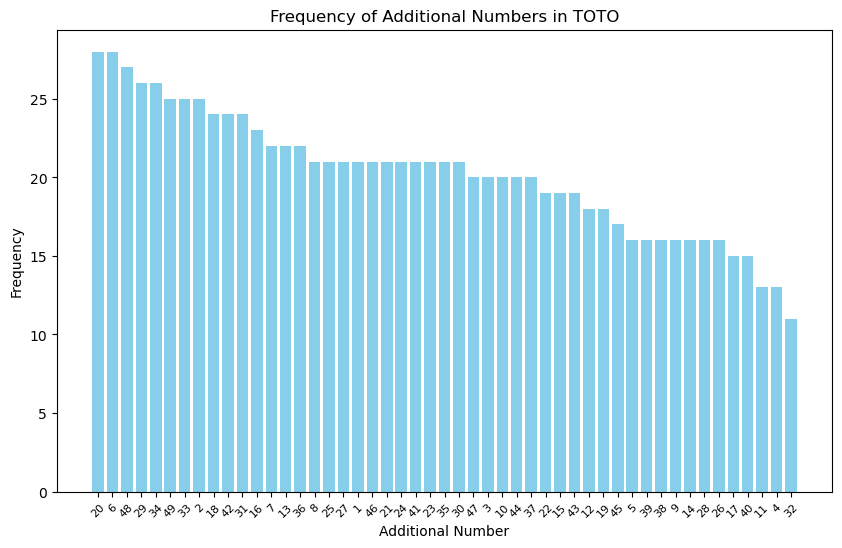

In [ ]:
# Plotting bar graph
fig,ax = plt.subplots(figsize=(10,6))

x = np.arange(len(add_num_freq_df['Additional Number']))
spacing = 0.5

ax.bar(x * spacing, add_num_freq_df['Frequency'], width = bar_width,
       color='skyblue')

ax.set_xlabel('Additional Number')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Additional Numbers in TOTO')
ax.set_xticks(x *  spacing)
ax.set_xticklabels(add_num_freq_df['Additional Number'],rotation=45
                   ,fontsize=8)

plt.show()

# Frequency of all numbers, INCLUDING Additional Number

In [ ]:
toto_small = toto.copy()

toto_small.drop(columns=['Date','From Last','Odd','Even','1-10','11-20','21-30',
                         '31-40','41-50','Updated Draw Num'],inplace=True)

all_num_freq = toto_small.stack().value_counts()
all_num_freq_df = all_num_freq.reset_index()
all_num_freq_df.columns = ['All Numbers','Frequency']
all_num_freq_df = all_num_freq_df.sort_values(by=['Frequency'],ascending=False)
all_num_freq_df.index = all_num_freq_df.index + 1

all_num_freq_df.head(10)

,All Numbers,Frequency
1,15,160
2,40,157
3,20,156
4,48,155
5,1,154
6,28,154
7,44,154
8,46,151
11,12,150
12,36,150


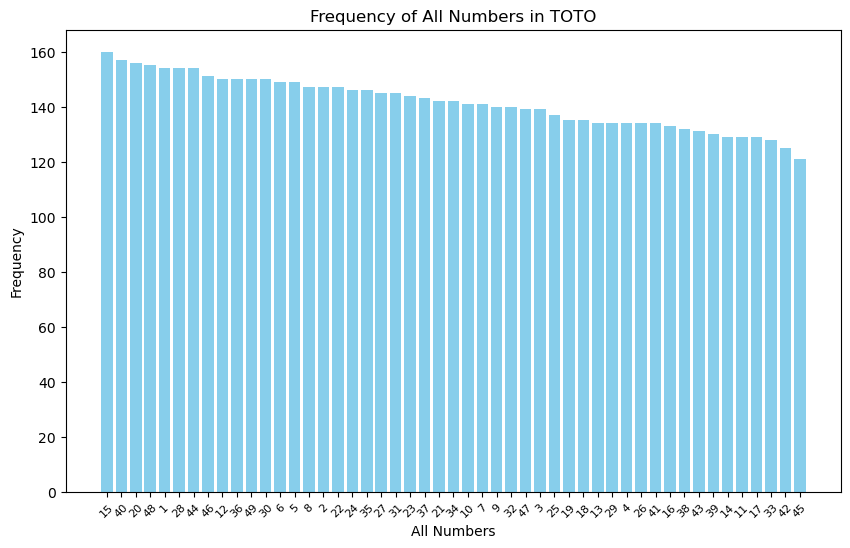

In [ ]:
# Plotting bar graph
fig,ax = plt.subplots(figsize=(10,6))

x = np.arange(len(all_num_freq_df['All Numbers']))
spacing = 0.5

ax.bar(x * spacing, all_num_freq_df['Frequency'], width = bar_width,
       color='skyblue')

ax.set_xlabel('All Numbers')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of All Numbers in TOTO')
ax.set_xticks(x *  spacing)
ax.set_xticklabels(all_num_freq_df['All Numbers'],rotation=45
                   ,fontsize=8)

plt.show()

In [ ]:
all_num_freq.head(7)

15    160
40    157
20    156
48    155
1     154
28    154
44    154
Name: count, dtype: int64

# Frequency of all numbers, EXCLUDING Additional Number



In [ ]:
toto_small2 = toto_small.copy()
toto_small2.drop(columns=['Additional Number'],inplace=True)

no_add_num_freq = toto_small2.stack().value_counts()
no_add_num_freq_df = no_add_num_freq.reset_index()

no_add_num_freq_df.columns = ['All Numbers Except Additional Number','Frequency']
no_add_num_freq_df = no_add_num_freq_df.sort_values(by=['Frequency'],ascending=False)
no_add_num_freq_df.index = no_add_num_freq_df.index + 1

no_add_num_freq_df.head(10)

,All Numbers Except Additional Number,Frequency
1,40,142
2,15,141
3,28,138
4,44,134
5,5,133
6,1,133
7,12,132
8,46,130
9,30,129
10,32,129


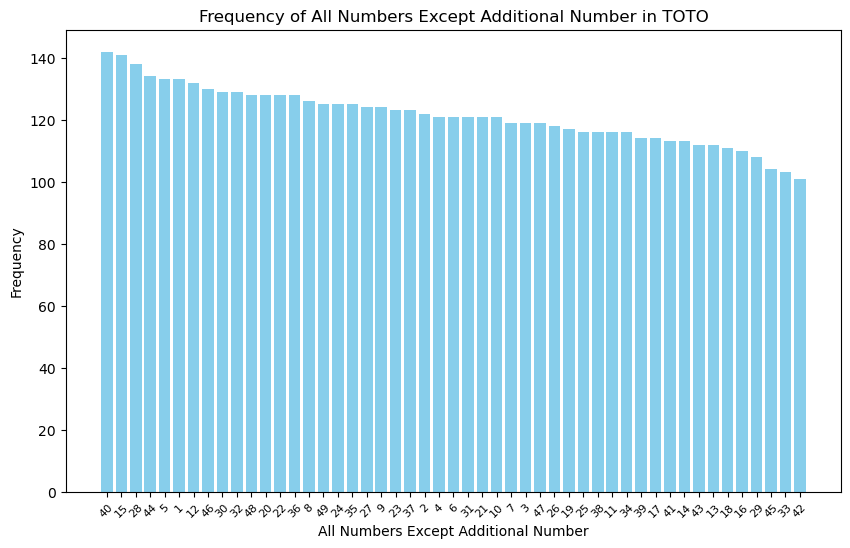

In [ ]:
# Plotting bar graph
fig,ax = plt.subplots(figsize=(10,6))

x = np.arange(len(no_add_num_freq_df['All Numbers Except Additional Number']))
spacing = 0.5

ax.bar(x * spacing, no_add_num_freq_df['Frequency'], width = bar_width,
       color='skyblue')

ax.set_xlabel('All Numbers Except Additional Number')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of All Numbers Except Additional Number in TOTO')
ax.set_xticks(x *  spacing)
ax.set_xticklabels(no_add_num_freq_df['All Numbers Except Additional Number'],rotation=45
                   ,fontsize=8)

plt.show()

In [ ]:
no_add_num_freq.head(6)

40    142
15    141
28    138
44    134
5     133
1     133
Name: count, dtype: int64

# Buy 1,15,28,40,44; 20 based on most frequent numbers and the most frequent additional number